<a href="https://colab.research.google.com/github/pcelicourt/agricultural-hydroinformatics/blob/master/Atelier_pratique_AI_RQRADv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a>
    <img width="1024", src="https://drive.google.com/uc?id=1OQikbN0VNprG-yZ9Z2HcVYFofTPgK4oC"></a>

L'atelier pratique suivant a pour objectif de vous initier à la détection d'objets par apprentissage profond en utilisant la technique de fine-tuning. Cette méthode permet à un modèle pré-existant de s'adapter à de nouvelles données. Nous nous concentrerons sur le modèle YOLOv8, un modèle réputé pour sa rapidité, sa précision et sa facilité d'utilisation. Pour plus d'informations, vous pouvez consulter les ressources disponibles sur <a href="https://github.com/ultralytics/ultralytics">GitHub</a> et <a href="https://docs.ultralytics.com/fr">Ultralytics</a> .

Dans le cadre de cet atelier, nous explorerons des données sur le dessèchement des feuilles de maïs, également connu sous le nom de Northern corn leaf blight (NCLB). Les images ont été acquises à l'aide d'un drone DJI Matrice 600 sUAS, volant à une altitude de 6 mètres avec une vélocité de 1 m/s, capturant des images en vue nadir toutes les 2 secondes (Wiesner-Hanks *et al*., 2028). La <a href="https://osf.io/p67rz/">base de données</a> contient 7669 images capturées par le drone  d'une résolution de 24 Mpx et 42 117 annotations.

</div>

## Installer les librairies et télécharger les données

Assurez-vous d'avoir accès à un GPU, car cela permet d'accélérer les traitements et d'améliorer les performances ; en cas de problème, vous pouvez accéder à `Modifier`, puis à `Paramètres du notebook` pour sélectionner un `GPU` et cliquer sur `Enregistrer`.

In [ ]:
!nvidia-smi

Thu Jun  6 01:40:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Installation de la librairie Ultralytics pour avoir accès aux modèles YOLO

In [ ]:
# Installer Ultralytics
!pip install -q wandb ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.2/289.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.3 MB/s eta 0:00:00


### Procédure pour télécharger ses propres données


<p>Pour obtenir l'ID du dossier, il suffit d'aller dans Google Drive et de cliquer sur <code>Autres actions</code> sur le dossier Zip désiré.</p>

<div align="center">
  <a href="https://drive.google.com/uc?id=1dE-ILgg4E9-sQokjt_V7N717C3UhWfkO">
    <img width="1024" src="https://drive.google.com/uc?id=1dE-ILgg4E9-sQokjt_V7N717C3UhWfkO">
  </a><br>
</div>

<p>Ensuite, sélectionnez l'option <code>partage</code>, puis cliquez sur <code>Copier le lien</code>.</p>

<div align="center">
  <a href="https://drive.google.com/uc?id=1HhTDf_HwgW-fVs_kIjsMY2BtsQQOgHRD">
    <img width="512" src="https://drive.google.com/uc?id=1HhTDf_HwgW-fVs_kIjsMY2BtsQQOgHRD">
  </a>
</div>

<p>Dans l'URL copiée, gardez uniquement la partie surlignée en jaune :</p>
<p>https://drive.google.com/file/d/<mark>1OsVdStveKkSfoeUT8LXw0bgK1ItkEt9F</mark>/view?usp=drive_link</p>

<p>Que vous utiliserez ensuite après <code>!gdown --id</code>.</p>




Une autre option pour accéder à vos données est d'utiliser le code suivant :
<br>
<code>from google.colab import drive
<br>
drive.mount('/content/drive')</code> <br>
Vos données seront ensuite accessible dans le 📁 du notebook.

###Télécharger le jeu de données

In [ ]:
!gdown --id 1OsVdStveKkSfoeUT8LXw0bgK1ItkEt9F # Télécharger les données
!unzip -q /content/atelier_cropback.zip # Dézipper les données

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OsVdStveKkSfoeUT8LXw0bgK1ItkEt9F
To: /content/atelier_cropback.zip
100% 15.6M/15.6M [00:00<00:00, 26.4MB/s]


## Visualiser les données et les annotations

Visualiser les données d'entraînement est une étape importante pour améliorer notre compréhension des données et détecter les erreurs d'annotation, afin d'éviter d'entraîner au modèle avec des données incohérentes.

Les données d'annotation YOLO sont formatées comme suit : classe, coordonnée du centre en x, coordonnée du centre en y, largeur et hauteur.

In [ ]:
import os

# Chemin du dossier contenant les fichiers texte
folder_path = '/content/atelier_cropback'

# Liste des fichiers texte dans le dossier
txt_files = [file for file in os.listdir(folder_path) if file.endswith('.txt')]

# Vérifier s'il y a au moins un fichier texte
if txt_files:
    # Chemin complet du premier fichier texte
    txt_file_path = os.path.join(folder_path, txt_files[0])

    # Lire le contenu du fichier texte
    with open(txt_file_path, 'r') as file:
        content = file.read()

    # Afficher le contenu du fichier texte
    print(content)
else:
    print("Aucun fichier texte trouvé dans le dossier.")

0 0.3516666666666667 0.21225 0.068 0.2815



Maintenant nous pouvons visualiser les annotations sur les images

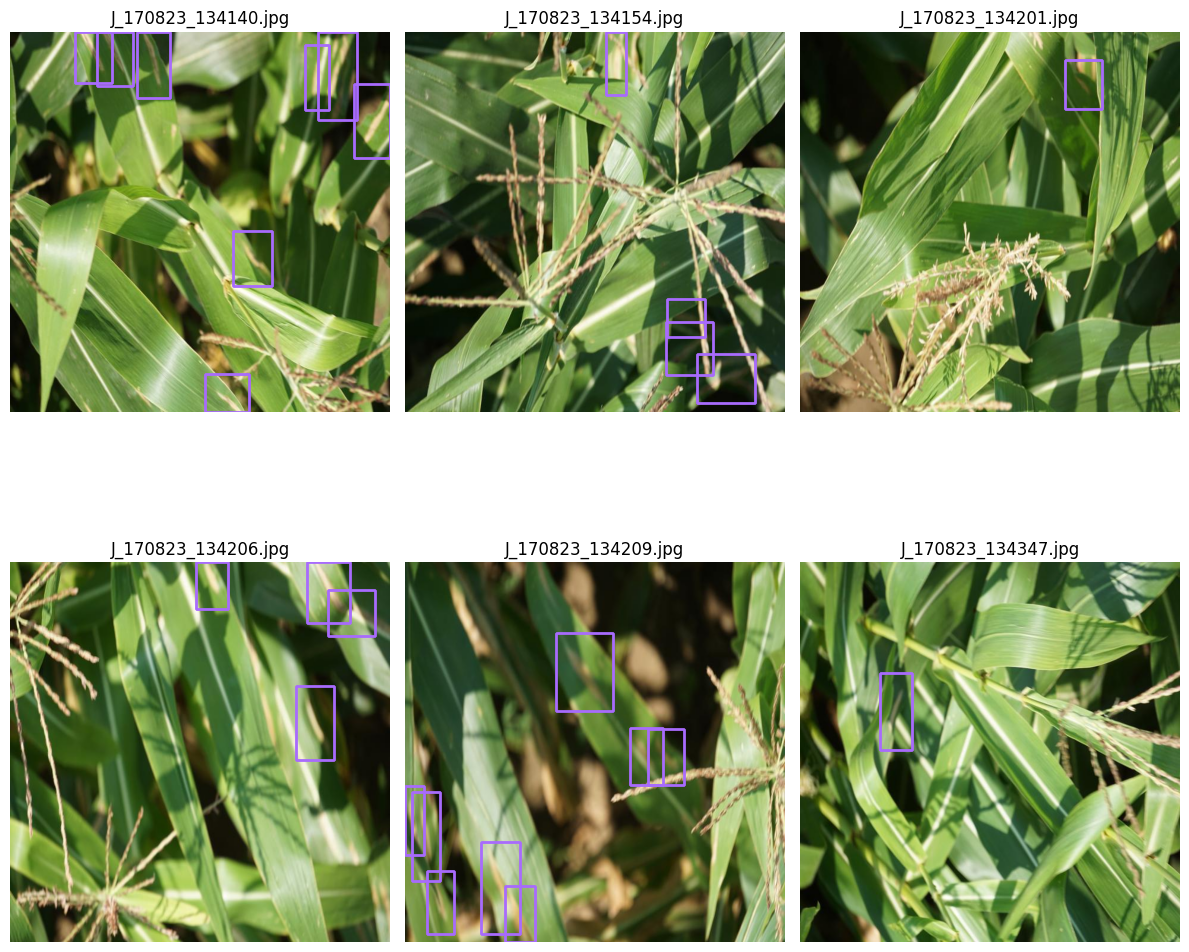

In [ ]:
# Importer les librairies nécessaire à la visualisation des images
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Chemin du dossier contenant les images
folder_path = "/content/atelier_cropback"

# Liste des fichiers dans le dossier
files = os.listdir(folder_path)
files.sort() # Trier les fichiers en ordre

# Affichage des 6 premières images
fig, axs = plt.subplots(2, 3, figsize=(12, 12))
axs = axs.flatten()

# Compter le nombre d'image affichée
image_counter = 0
for file_name in files:
    if not file_name.endswith(".jpg"):  # Vérifier l'extension de l'image
        continue

    # Chargement de l'image
    image_path = os.path.join(folder_path, file_name)
    img = Image.open(image_path)

    # Affichage de l'image
    axs[image_counter].imshow(img)
    axs[image_counter].axis('off')
    axs[image_counter].set_title(file_name)

    # Lecture des annotations au format YOLO
    annotation_path = os.path.splitext(image_path)[0] + ".txt"
    with open(annotation_path, "r") as f:
        annotations = f.readlines()

    # Dessiner les annotations sur l'image
    for annotation in annotations:
        class_id, x_center, y_center, width, height = map(float, annotation.split())
        x = x_center - width / 2
        y = y_center - height / 2
        rect = patches.Rectangle((x * img.width, y * img.height), width * img.width, height * img.height, linewidth=2, edgecolor='#a86bfd', facecolor='none', joinstyle='bevel')
        axs[image_counter].add_patch(rect)

    # Arrêt de la boucle si les 6 images ont déjà été traitées
    image_counter += 1
    if image_counter >= 6:
        break

#Affichage les images et annotations
plt.tight_layout()
plt.show()


## Formater les données

Pour le bien de l'exercice, toutes les images et leurs annotations ont été préalablement redimensionnées afin de respecter les dimensions maximales supportées par YOLOv8, soit 640 x 640 pixels. Seulement 305 images ont été retenues pour limiter le temps de traitement.

<div>
  <p>Pour une bonne gestion des données, il est recommandé de diviser les images en trois ensembles distincts : l'entraînement, la validation et le test. Les ratios entre ces ensembles peuvent varier en fonction de la quantité et de la nature des données. Les ratios les plus courants sont :</p>
  
  <a>
    <img width="1024" src="https://drive.google.com/uc?id=1h2Qdr-vWkMlnPvTUKX_OhrJZtD8NDs9s"></a>
    
  <p>Il est important de s'assurer que l'ensemble de test contient des données que le modèle n'a jamais vue pour éviter les biais lors de l'évaluation de sa performance.</p>
</div>



In [ ]:
# Diviser les images en 3 groupes pour l'entraînement, la validation et le test
import os, shutil, random
from tqdm import tqdm
from pathlib import Path

# Déterminer un seed pour la reproductibilité
seed = 3
random.seed(seed)

# Répertoires pour les données en entrée et en sortie
source_dir= Path('/content/atelier_cropback')
output_dir = Path('/content/data')

# Créer des répertoires pour les annotations et les images
for d1 in ['train','val','test']:
  (output_dir / f'{d1}/labels').mkdir(parents=True, exist_ok=True)  # Créer le répertoire pour les annotations
  (output_dir / f'{d1}/images').mkdir(parents=True, exist_ok=True)  # Créer le répertoire pour les images

# Récupérer toutes les images
files = list(source_dir.glob("*.jpg"))

# Mélanger les fichiers
random.shuffle(files)

# Diviser les fichiers en groupes
train_files = files[:int(0.8*len(files))] # 80% pour l'entraînement
validation_files = files[int(0.8*len(files)):int(0.9*len(files))] # 10% pour la validation
test_files = files[int(0.9*len(files)):] # 10% pour le test

# Copier les fichiers dans les dossiers appropriés
pbar = tqdm(train_files, desc=f'Converting {source_dir}')
for file in pbar:
    shutil.copy(file, (output_dir / 'train/images'))
    f= file.with_suffix('.txt')
    if os.path.exists(f):
      shutil.copy(f, (output_dir / 'train/labels'))

pbar = tqdm(validation_files, desc=f'Converting {source_dir}')
for file in pbar:
    shutil.copy(file, (output_dir / 'val/images'))
    f= file.with_suffix('.txt')
    if os.path.exists(f):
      shutil.copy(f, (output_dir / 'val/labels'))

pbar = tqdm(test_files, desc=f'Converting {source_dir}')
for file in pbar:
    shutil.copy(file, (output_dir / 'test/images'))
    f= file.with_suffix('.txt')
    if os.path.exists(f):
      shutil.copy(f, (output_dir / 'test/labels'))

Converting /content/atelier_cropback: 100%|██████████| 31/31 [00:00<00:00, 2791.58it/s]


In [ ]:
#Créer un fichier de configuration pour spécifier les chemins des données et les noms des classes
%%writefile /content/data.yaml
# # Les ensembles train/val/test sont définis comme 1) répertoire : chemin/vers/images, 2) fichier : chemin/vers/images.txt, ou 3) liste : [chemin/vers/images1, chemin/vers/images2, ..]
path: /content/data  # répertoire du jeu de données
train: train/images  # images d'entraînement 238 images
val: val/images  # images de validation 30 images
test: test/images  # images de test (optionnel) 30 images

names:
  0: NCLB # Northern corn leaf blight

Writing /content/data.yaml


## Entraînement du modèle (Fine-tuning)

In [ ]:
# Permet d'obtenir un aperçu de la configuration actuelle des paramètres
from ultralytics import settings

# Voir tout les paramètres
print(settings)

# Renvoyer un paramètre spécifique
value = settings['runs_dir']

{'settings_version': '0.0.4', 'datasets_dir': '/content/datasets', 'weights_dir': 'weights', 'runs_dir': 'runs', 'uuid': '569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb', 'sync': True, 'api_key': '', 'openai_api_key': '', 'clearml': True, 'comet': True, 'dvc': True, 'hub': True, 'mlflow': True, 'neptune': True, 'raytune': True, 'tensorboard': True, 'wandb': True}


In [ ]:
# Permet de voir les paramètres d'entraînement
!yolo cfg

Printing '/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/default.yaml'

task: detect
mode: train
model: null
data: null
epochs: 100
time: null
patience: 100
batch: 16
imgsz: 640
save: true
save_period: -1
cache: false
device: null
workers: 8
project: null
name: null
exist_ok: false
pretrained: true
optimizer: auto
verbose: true
seed: 0
deterministic: true
single_cls: false
rect: false
cos_lr: false
close_mosaic: 10
resume: false
amp: true
fraction: 1.0
profile: false
freeze: None
multi_scale: false
overlap_mask: true
mask_ratio: 4
dropout: 0.0
val: true
split: val
save_json: false
save_hybrid: false
conf: null
iou: 0.7
max_det: 300
half: false
dnn: false
plots: true
source: null
vid_stride: 1
stream_buffer: false
visualize: false
augment: false
agnostic_nms: false
classes: null
retina_masks: false
embed: null
show: false
save_frames: false
save_txt: false
save_conf: false
save_crop: false
show_labels: true
show_conf: true
show_boxes: true
line_width: null
format: torchscript
k

### Marche à suivre Wandb

<div align="center">
    <p>Pour vous connecter à Wandb, il vous suffit simplement de cliquer sur le lien suivant : <a href="https://wandb.ai/authorize">https://wandb.ai/authorize</a>, qui s'affichera lorsque vous exécuterez la cellule.</p>
    <p>Vous serez alors redirigé vers une nouvelle page où vous pourrez vous connecter.</p>
    <a>
        <img width="256" src="https://drive.google.com/uc?id=1WaCT4aWx_ELj7Ezbh8ez7RD-yqRLjcY9">
    </a>
    <p>Par la suite, il vous suffira de copier le code fourni :</p>
    <a>
        <img width="256" src="https://drive.google.com/uc?id=1A--Yp2QznRltfKOSw8A-iupjGYLHShVN">
    </a>
    <p>Puis de le coller à cet endroit et d'appuyer sur la touche "Entrée" :</p>
    <a>
        <img width="1024" src="https://drive.google.com/uc?id=14gURKC8l26RQaFjYGbdLuQ4QVfNrkzKy">
    </a>
</div>


###Connection Wandb

In [ ]:
!wandb login # login dans wandb

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


###Fine-tuning

In [ ]:
from ultralytics import YOLO
import wandb
model_name = "yolov9c" #@param ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x', 'yolov9c', 'yolov9e']
dataset_name = "/content/data.yaml" #@param {type:"string"}
batch_size = 16 # @param {type:"integer"}
epochs = 15 # @param {type:"integer"}
# Initialize YOLO Model
model = YOLO(f"{model_name}.pt")

# Add Weights & Biases callback for Ultralytics
#add_wandb_callback(model, enable_model_checkpointing=True)
# Train/fine-tune your model
# At the end of each epoch, predictions on validation batches are logged
# to a W&B table with insightful and interactive overlays for
# computer vision tasks
model.train(project="ultralytics",
            data=dataset_name,
            batch= batch_size,
            verbose= True,
            val= True,
            epochs= epochs
            )
model.val()

# Finish the W&B run
wandb.finish()

100%|██████████| 49.4M/49.4M [00:01<00:00, 40.1MB/s]


Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=ultralytics, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 46.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

wandb: Currently logged in as: dubrule1965 (equipe). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 50.7MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 237 images, 7 backgrounds, 0 corrupt: 100%|██████████| 244/244 [00:00<00:00, 1754.71it/s]

train: New cache created: /content/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data/val/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 930.25it/s]

val: New cache created: /content/data/val/labels.cache


Plotting labels to ultralytics/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ultralytics/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      11.8G      2.708        3.7      2.646         20        640: 100%|██████████| 16/16 [00:15<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]

                   all         30        205     0.0187      0.122      0.022    0.00721



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      11.6G      2.075      2.562      2.047         38        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         30        205       0.19      0.205      0.108     0.0361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      11.6G      1.875       2.14       1.93         26        640: 100%|██████████| 16/16 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         30        205   0.000288    0.00976   0.000145   2.92e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      11.7G      1.857      2.009      1.921         42        640: 100%|██████████| 16/16 [00:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         30        205   0.000222    0.00976   0.000112   5.06e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      11.7G      1.788      1.868      1.906         33        640: 100%|██████████| 16/16 [00:05<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         30        205    0.00228     0.0244    0.00118   0.000657


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      11.7G      1.839      2.047      2.025          9        640: 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         30        205    0.00103     0.0341   0.000469   0.000197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      11.6G      1.783      2.051       1.98          7        640: 100%|██████████| 16/16 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         30        205       0.01      0.327     0.0068     0.0026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      11.6G      1.695      1.835      1.966         27        640: 100%|██████████| 16/16 [00:08<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         30        205     0.0961     0.0293     0.0277     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      11.6G      1.619      1.758      1.859         11        640: 100%|██████████| 16/16 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         30        205     0.0904     0.0341     0.0216    0.00586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      11.6G      1.636       1.73      1.876          6        640: 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         30        205      0.374      0.254      0.235       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      11.6G      1.644      1.677      1.859          9        640: 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         30        205      0.506      0.468      0.462      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      11.7G      1.578      1.621      1.822         32        640: 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         30        205      0.493      0.546      0.523      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      11.6G      1.536      1.574      1.766         22        640: 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         30        205      0.606      0.512      0.549      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      11.6G      1.531      1.457      1.772         39        640: 100%|██████████| 16/16 [00:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         30        205      0.727      0.585       0.65      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      11.6G      1.439      1.413      1.738         28        640: 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         30        205      0.643      0.605      0.649      0.385



15 epochs completed in 0.051 hours.
Optimizer stripped from ultralytics/train/weights/last.pt, 51.6MB
Optimizer stripped from ultralytics/train/weights/best.pt, 51.6MB

Validating ultralytics/train/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


                   all         30        205      0.642      0.613      0.648      0.383
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to ultralytics/train


Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/data/val/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]


                   all         30        205      0.643       0.61      0.649      0.385
Speed: 0.2ms preprocess, 38.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to ultralytics/train2


#Prédiction

Utilisez le modèle pour effectuer des prédictions sur les images de tests

In [ ]:
prediction = model.predict(test_files[:10]) #prédictions pour les 10 premières images


0: 640x640 13 NCLBs, 15.6ms
1: 640x640 11 NCLBs, 15.6ms
2: 640x640 1 NCLB, 15.6ms
3: 640x640 7 NCLBs, 15.6ms
4: 640x640 4 NCLBs, 15.6ms
5: 640x640 2 NCLBs, 15.6ms
6: 640x640 14 NCLBs, 15.6ms
7: 640x640 3 NCLBs, 15.6ms
8: 640x640 26 NCLBs, 15.6ms
9: 640x640 8 NCLBs, 15.6ms
Speed: 1.8ms preprocess, 15.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Comparer les annotations avec les prédictions

In [ ]:
# Import des bibliothèques nécessaires
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import re

# Initialisation des listes pour stocker les annotations réelles, les prédictions et les noms des images de test
boites_reelles = []
boites_predites = []
label_test = []

# Fonction pour lire les annotations à partir d'un fichier
def read_annotations_from_file(file_path):
    with open(file_path, 'r') as file:
        annotations = [line.strip() for line in file.readlines()]
    return annotations

# Chemin des fichiers d'annotations des images de test
path_label = '/content/data/test/labels/'

# Parcourir tous les fichiers d'annotations dans le répertoire
for label_file in os.listdir(path_label):
    # Extraire le nom de l'image à partir du nom du fichier d'annotation
    relabel= re.findall(r'^(.+)\.txt$', label_file)
    # Lire les annotations à partir du fichier
    annotations_from_file = read_annotations_from_file(os.path.join(path_label, label_file))
    # Ajouter les boîtes englobantes du fichier d'annotation à la liste des boîtes réelles
    for annotation in annotations_from_file:
        class_id, x_center, y_center, box_width, box_height = map(float, annotation.split())
        box = {
            "position": {
                "minX": (x_center - box_width/2),
                "maxX": (x_center + box_width/2),
                "minY": (y_center - box_height/2),
                "maxY": (y_center + box_height/2),
            },
            "class_id": int(class_id),
            "box_caption": 'Annotation',
            "nm_image": relabel,
        }
        boites_reelles.append(box)

# Parcourir tous les fichiers de prédictions
for pred in prediction:
    # Copier l'image originale
    image = pred.orig_img.copy()
    height, width, _ = image.shape
    # Extraire le nom de l'image à partir du chemin de la prédiction
    repredic = re.findall(r'/([^/]+)\.jpg$', pred.path)
    label_test.append(repredic)
    # Parcourir toutes les prédictions pour l'image actuelle
    for pred_i in range(len(pred)):
        # Obtenir l'identifiant de classe et la confiance de la prédiction
        class_id = list(pred.names.keys())[0]
        conf = str(round(float(pred.boxes.conf[pred_i]), 2))
        box_caption = f"{pred.names[0]} {conf}"
        # Ajouter les coordonnées de la boîte prédite à la liste des boîtes prédites
        box = {
            "position": {
                "minX": float(int(pred.boxes.xyxy[pred_i, 0]) / width),
                "maxX": float(int(pred.boxes.xyxy[pred_i, 2]) / width),
                "minY": float(int(pred.boxes.xyxy[pred_i, 1]) / height),
                "maxY": float(int(pred.boxes.xyxy[pred_i, 3]) / height),
            },
            "class_id": int(class_id),
            "box_caption": box_caption,
            "nm_image": repredic,
            "scores" : round(float(pred.boxes.conf[pred_i]), 2)
        }
        boites_predites.append(box)

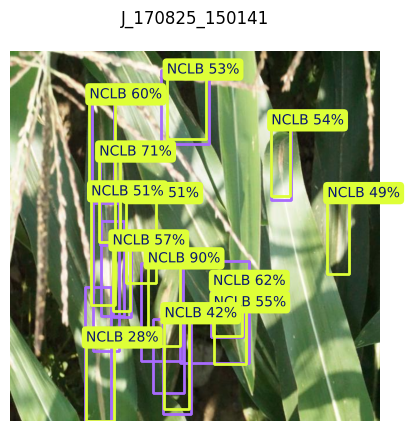

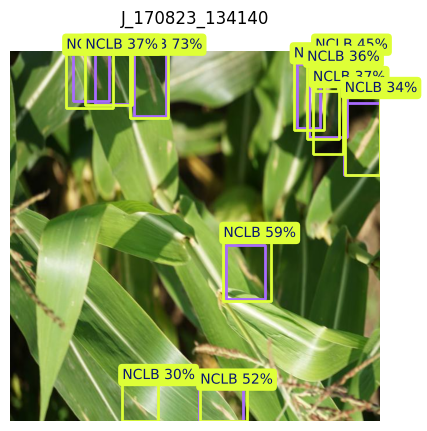

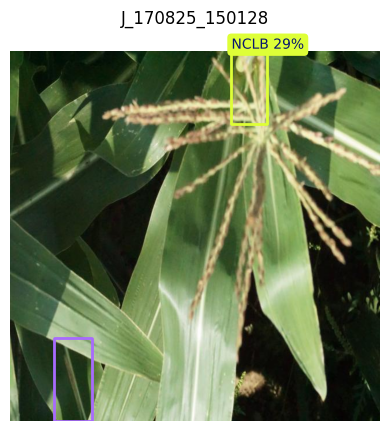

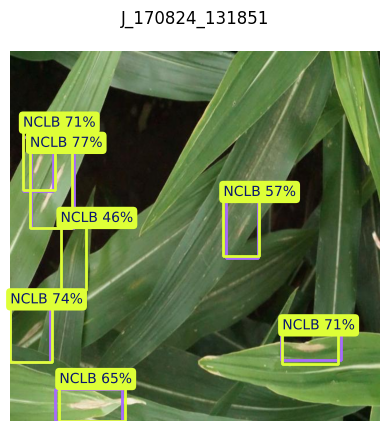

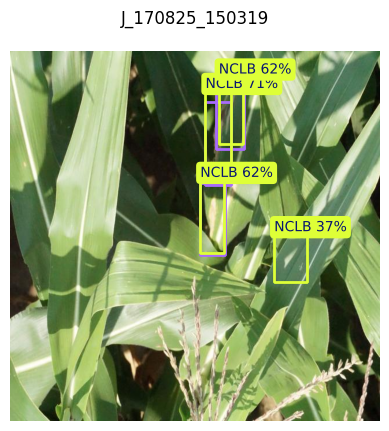

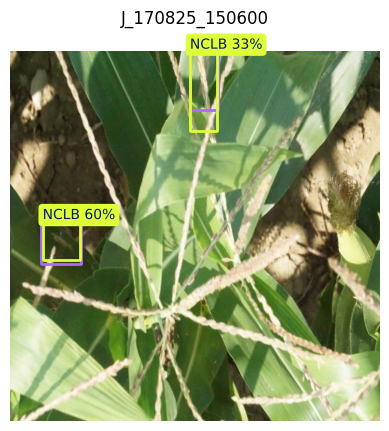

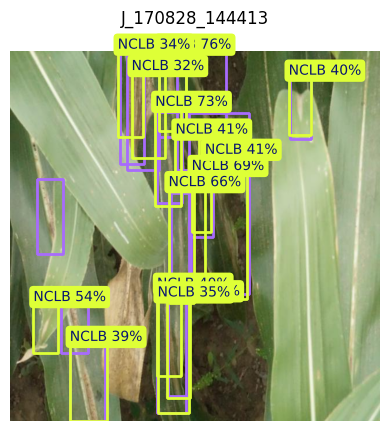

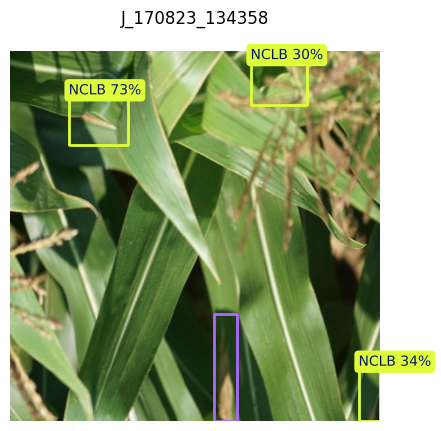

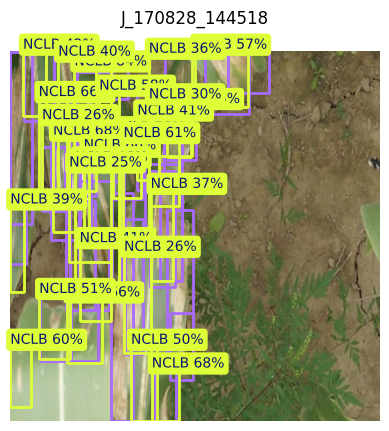

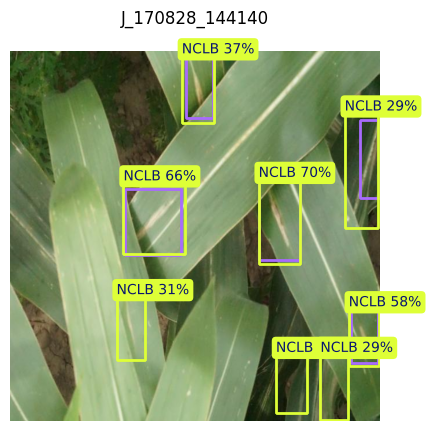

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
for i in label_test:
    boite_eng = []
    for k in boites_reelles:
        if i == k['nm_image']:
            boite_eng.append((k['position'], 1))
    for j in boites_predites:
        if i == j['nm_image']:
            boite_eng.append((j['position'], 2, j['scores']))

    nm_image_value = i[0]
    image_path = f'/content/data/test/images/{nm_image_value}.jpg'
    image = Image.open(image_path)

    # Créer une figure et un axe
    fig, ax = plt.subplots(1)

    # Ne pas afficher les axes
    ax.axis('off')

    # Afficher l'image
    ax.imshow(image)

    # Ajouter le titre de l'image avec un espacement supplémentaire
    ax.set_title(nm_image_value, pad=20)

    for boite in boite_eng:
        if boite[1] == 1:
            minXa, maxXa, minYa, maxYa = boite[0]['minX'], boite[0]['maxX'], boite[0]['minY'], boite[0]['maxY']
            largeur_image, hauteur_image = image.size
            minXa *= largeur_image
            maxXa *= largeur_image
            minYa *= hauteur_image
            maxYa *= hauteur_image

            # Calculer la largeur et la hauteur de la boîte englobante
            largeura = maxXa - minXa
            hauteura = maxYa - minYa

            # Créer un rectangle de boîte englobante
            rectangle2 = patches.Rectangle((minXa, minYa), largeura, hauteura, linewidth=2, edgecolor='#a86bfd', facecolor='none', joinstyle='bevel')
            ax.add_patch(rectangle2)

        else:
            # Extraire les coordonnées de la boîte englobante
            minX, maxX, minY, maxY = boite[0]['minX'], boite[0]['maxX'], boite[0]['minY'], boite[0]['maxY']

            largeur_image, hauteur_image = image.size
            minX *= largeur_image
            maxX *= largeur_image
            minY *= hauteur_image
            maxY *= hauteur_image

            # Calculer la largeur et la hauteur de la boîte englobante
            largeur = maxX - minX
            hauteur = maxY - minY

            # Créer un rectangle de boîte englobante
            rectangle = patches.Rectangle((minX, minY), largeur, hauteur, linewidth=2, edgecolor='#deff37', facecolor='none', joinstyle='bevel')
            ax.add_patch(rectangle)
            confidence = boite[2]

            # Ajouter le texte avec un rectangle de fond plus petit et coins arrondis
            bbox_props = dict(boxstyle="round,pad=0.3", fc="#deff37", ec="none", lw=2)
            text = ax.text(minX, minY, f"NCLB {confidence*100:.0f}%", color='#09166f', fontsize=10, verticalalignment='bottom',
                    bbox=bbox_props)

            # Ajouter l'effet d'ombre pour obtenir des coins arrondis
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='#deff37'), path_effects.Normal()])

    # Afficher la figure
    plt.show()

🎉 Félicitations, vous venez d'apprendre comment fine-tuner un modèle de détection d'objets. 🎉

##Ressources pertinentes

<p>
  Sources de données : <a href="https://www.kaggle.com/">Kaggle</a>, <a href="https://universe.roboflow.com/">Roboflow Universe</a><br>
  Sources de code : GitHub, <a href="https://huggingface.co/">Hugging Face</a><br>
  Source de suivi des données : <a href="https://wandb.ai/site">Weights & Biases (wandb)</a><br>
  Répertoire de publications scientifiques et de codes : <a href="https://paperswithcode.com/">Papers with code</a><br>
  Outils d'annotation : <a href="https://www.makesense.ai/">Make Sense</a>, <a href="https://docs.voxel51.com/">FiftyOne</a>, <a href="https://roboflow.com/">Roboflow</a><br>
  Source sur les métriques : <a href="https://docs.ultralytics.com/fr/guides/yolo-performance-metrics/#results-storage/">Mesures de performance avec YOLO </a>, <a href="https://www.v7labs.com/blog/mean-average-precision/">Explication sur la mean average precision (mAP) </a>
</p>

